In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<AxesSubplot:>

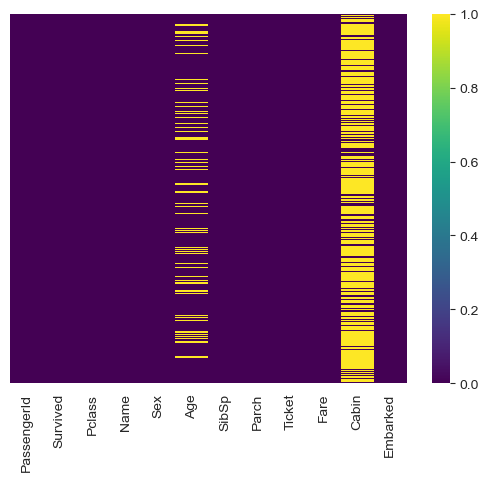

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Clasification of survivers 

<AxesSubplot:xlabel='Survived', ylabel='count'>

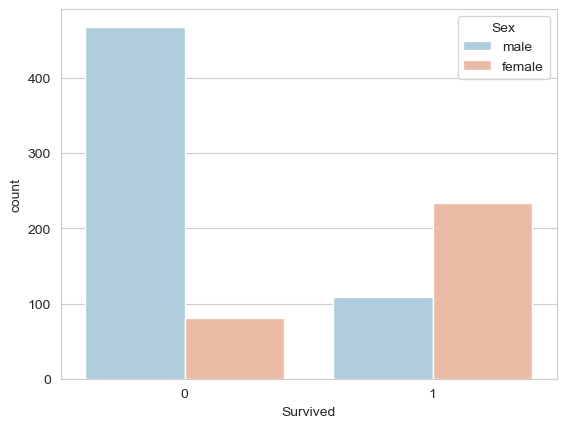

In [9]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

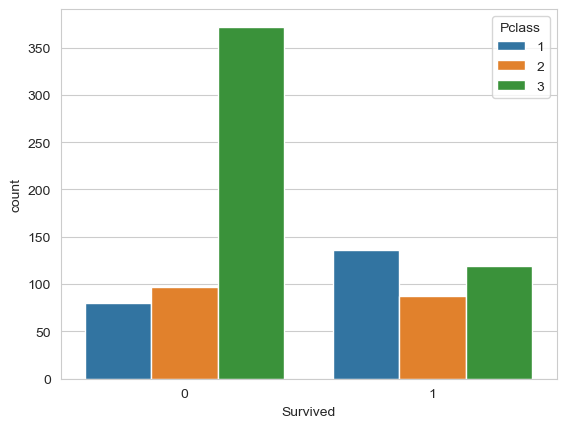

In [10]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [11]:
# Age of the people

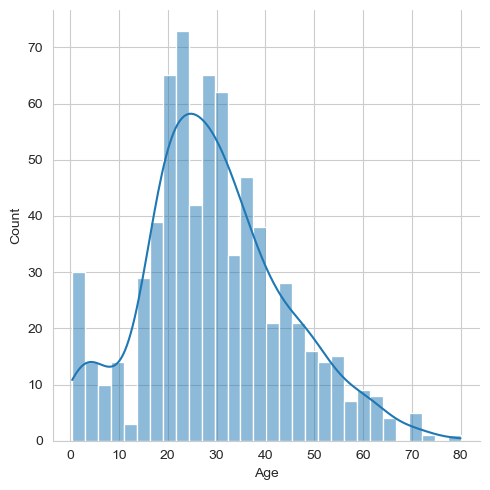

In [12]:
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

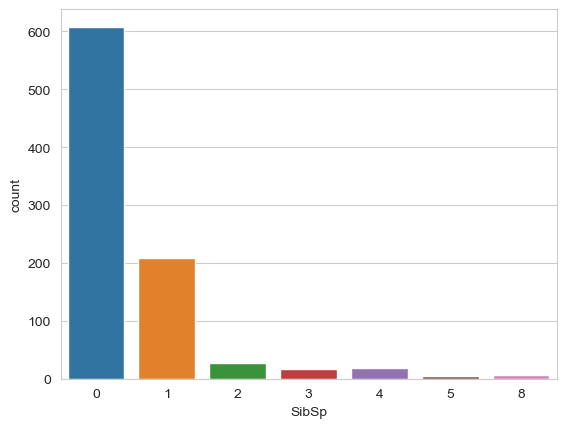

In [13]:
sns.countplot(x='SibSp',data =train)

<AxesSubplot:>

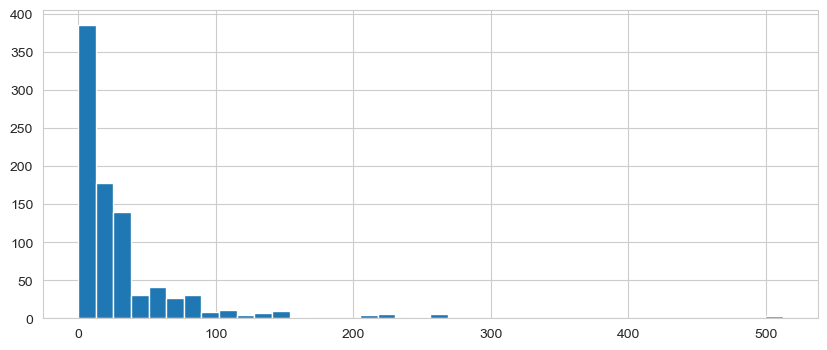

In [14]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [15]:
# Using interactive plot
import cufflinks as cf


In [16]:
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist',bins=40)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train['Ticket'].iplot(kind='hist',bins=40)

In [20]:
# Handling Missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

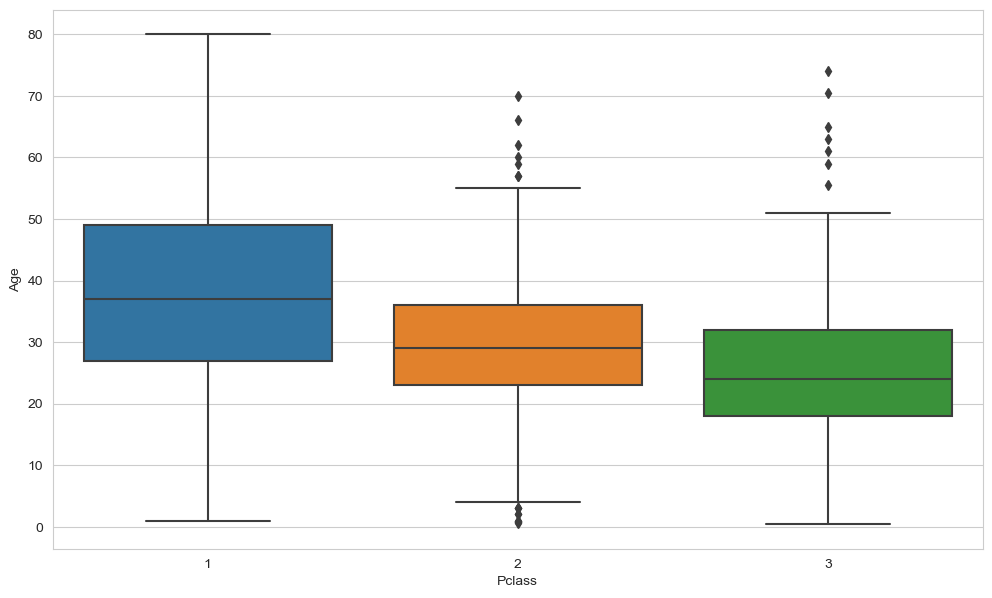

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [22]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age
    
        

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

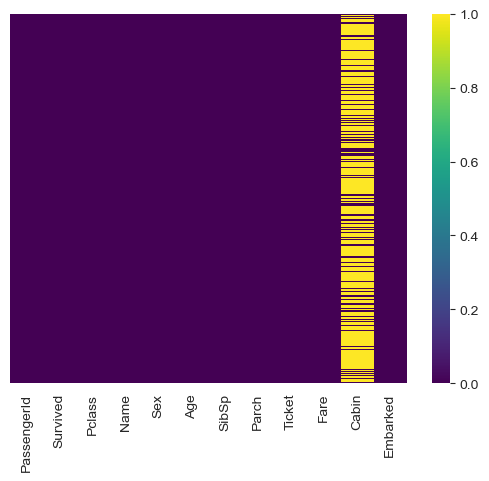

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [26]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

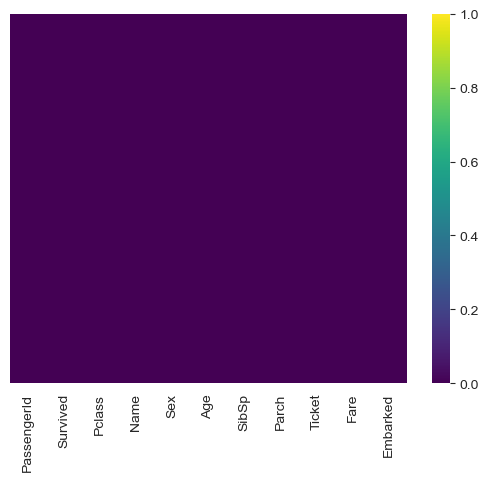

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [28]:
train['Embarked'] =train['Embarked'].dropna() 

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [30]:
train.duplicated().sum()

0

In [31]:
## Data Featurisation

## Dummy Variable

In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [33]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [34]:
train = pd.concat([train,sex,embark],axis=1)

In [35]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [37]:
train.drop(['PassengerId'],inplace=True,axis=1)

In [38]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [39]:
## To Do Differences of Leaving The Pclass as a Dummy separation of Variables or using the column by itself

In [40]:
## How The model will react how it is treated as a category or as a continious data

In [41]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [42]:
train = pd.concat([train,pclass],axis=1)

In [43]:
train.drop(['Pclass'],inplace=True,axis=1)

In [44]:
train.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

In [45]:
## Model Creation

In [113]:
X= train.drop('Survived',axis=1)
y = train['Survived']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [123]:
logmodel= LogisticRegression()

In [124]:
logmodel.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [125]:
pred = logmodel.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [126]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



# Using The Test Data To make prediction


In [52]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [54]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

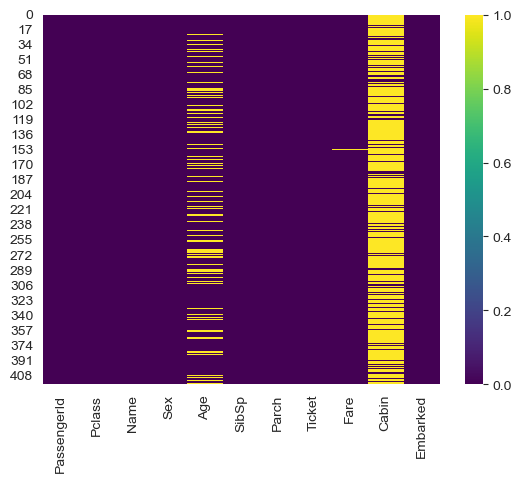

In [56]:
sns.heatmap(test.isnull(),cmap='viridis')

In [57]:
sns.displot(test['Age'],kde=True,bins=30)

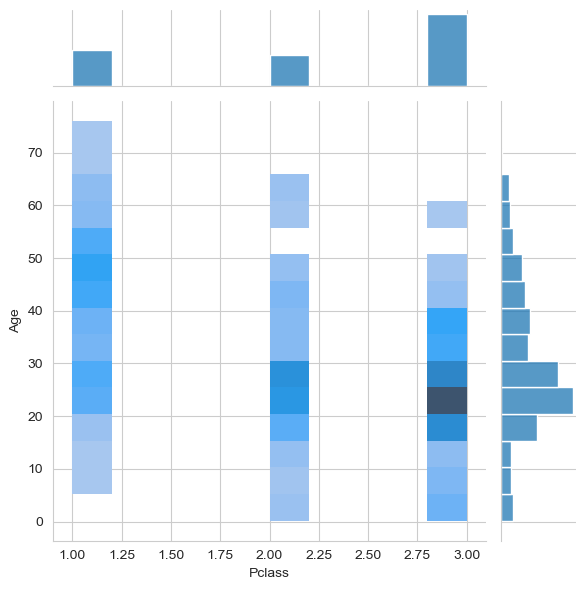

In [58]:
sns.jointplot(y='Age',x='Pclass',kind='hist',data=test)

In [59]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test,hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

In [60]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

In [61]:
## correlation

<AxesSubplot:>

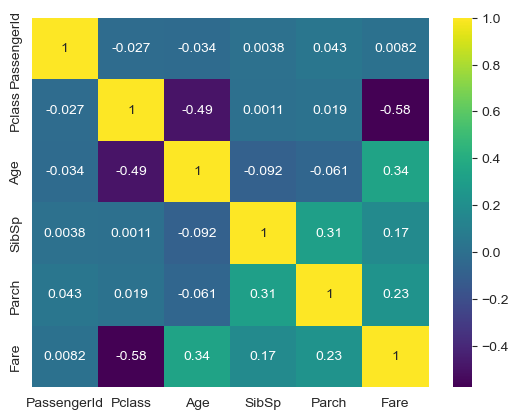

In [62]:
sns.heatmap(test.corr(),annot=True,cmap='viridis')

In [63]:
## Handling missing values

In [90]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [65]:
# Missing data on age

In [67]:
# To find The mean Ages That will be returned

first = test[test['Pclass'] == 3]

# Calculate the mean age
mean_age = first['Age'].mean()

print(mean_age)


24.02794520547945


In [68]:
def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 41
        elif Pclass ==2:
            return 29
        else:
            return 24
    return Age

In [69]:
test['Age'] = test[['Age','Pclass']].apply(age_impute,axis=1)

In [70]:
test.drop('Cabin',axis=1,inplace=True)

In [96]:
test['Fare'] =test['Fare'].fillna(test['Fare'].mean())

In [97]:
test['Fare'].isna().sum()

0

In [98]:
sns.heatmap(test.isnull(),cmap='viridis')

<AxesSubplot:>

# Data Featurisation

In [99]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

In [100]:
## Dummy variables

In [101]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark =pd.get_dummies(test['Embarked'],drop_first=True)

In [103]:
embark.head()

Q  S
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1

In [110]:
test.drop(['Name','Sex','PassengerId','Embarked','Ticket'],axis=1,inplace=True)

In [106]:
pd.concat([test,sex,embark])

PassengerId  Pclass                                          Name  \
0          892.0     3.0                              Kelly, Mr. James   
1          893.0     3.0              Wilkes, Mrs. James (Ellen Needs)   
2          894.0     2.0                     Myles, Mr. Thomas Francis   
3          895.0     3.0                              Wirz, Mr. Albert   
4          896.0     3.0  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413          NaN     NaN                                           NaN   
414          NaN     NaN                                           NaN   
415          NaN     NaN                                           NaN   
416          NaN     NaN                                           NaN   
417          NaN     NaN                                           NaN   

        Sex   Age  SibSp  Parch   Ticket     Fare Embarked  male    Q    S  
0      male  34.5    0.0    0.0   330911   7.8292        Q   NaN  NaN  NaN  
1    female  47.0    1.0    0.0   363272   7.0000        S   NaN  NaN  NaN  
2      male  62.0    0.0    0.0   240276   9.6875        Q   NaN  NaN  NaN  
3      male  27.0    0.0    0.0   315154   8.6625        S   NaN  NaN  NaN  
4    female  22.0    1.0    1.0  3101298  12.2875        S   NaN  NaN  NaN  
..      ...   ...    ...    ...      ...      ...      ...   ...  ...  ...  
413     NaN   NaN    NaN    NaN      NaN      NaN      NaN   NaN  0.0  1.0  
414     NaN   NaN    NaN    NaN      NaN      NaN      NaN   NaN  0.0  0.0  
415     NaN   NaN    NaN    NaN      NaN      NaN      NaN   NaN  0.0  1.0  
416     NaN   NaN    NaN    NaN      NaN      NaN      NaN   NaN  0.0  1.0  
417     NaN   NaN    NaN    NaN      NaN      NaN      NaN   NaN  0.0  0.0  

[1254 rows x 13 columns]

In [112]:
test.head()

Pclass   Age  SibSp  Parch     Fare
0       3  34.5      0      0   7.8292
1       3  47.0      1      0   7.0000
2       2  62.0      0      0   9.6875
3       3  27.0      0      0   8.6625
4       3  22.0      1      1  12.2875

In [120]:
train = pd.concat([train,test],axis=1)

In [121]:
train.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3  2  3  Pclass  \
0         0  22.0      1      0   7.2500     1  0  1  0  1  0  1     3.0   
1         1  38.0      1      0  71.2833     0  0  0  0  0  0  0     3.0   
2         1  26.0      0      0   7.9250     0  0  1  0  1  0  1     2.0   
3         1  35.0      1      0  53.1000     0  0  1  0  0  0  0     3.0   
4         0  35.0      0      0   8.0500     1  0  1  0  1  0  1     3.0   

    Age  SibSp  Parch     Fare  
0  34.5    0.0    0.0   7.8292  
1  47.0    1.0    0.0   7.0000  
2  62.0    0.0    0.0   9.6875  
3  27.0    0.0    0.0   8.6625  
4  22.0    1.0    1.0  12.2875